In [19]:
# create a model with "cardiffnlp/twitter-roberta-base-sentiment"
# use the model to predict the sentiment of a sample text
# print the sentiment of the text

In [20]:
from transformers import pipeline
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset

In [21]:
# change the labels of the model LABEL_0 = "negative" LABEL_1 = "neutral" LABEL_2 = "positive"
model = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment", top_k=3)
# use the model to predict the sentiment of a sample text
result = model("I hate you")[0]
# print the sentiment of the text
print(result)

[{'label': 'LABEL_0', 'score': 0.965427041053772}, {'label': 'LABEL_1', 'score': 0.028996311128139496}, {'label': 'LABEL_2', 'score': 0.005576656199991703}]


In [22]:
# create a class that uses the model to predict the sentiment of a input test
# the returned labels should be "negative", "neutral" and "positive" instead of "LABEL_0", "LABEL_1" and "LABEL_2"

class SentimentAnalysis:
    def __init__(self):
        self.model = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment", top_k=3)
        self.labels = {"LABEL_0": "negative", "LABEL_1": "neutral", "LABEL_2": "positive"}

    def predict(self, text):
        result = self.model(text)[0]
        results = {self.labels[res["label"]]: res['score'] for res in result}
        return results

In [23]:
# create an instance of the class
# use the instance to predict the sentiment of a sample text
# print the sentiment of the text

sentiment_analysis = SentimentAnalysis()
result = sentiment_analysis.predict("I hate you")
print(result)

{'negative': 0.965427041053772, 'neutral': 0.028996311128139496, 'positive': 0.005576656199991703}


In [24]:
# download the Stanford Sentiment Treebank Dataset
dataset = load_dataset("glue", "sst2")

# print the size of the dataset
print(len(dataset["train"]))

# print the first row of the dataset
print(dataset["train"][:5])

Found cached dataset glue (C:/Users/Tobias/.cache/huggingface/datasets/glue/sst2/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


  0%|          | 0/3 [00:00<?, ?it/s]

67349
{'sentence': ['hide new secretions from the parental units ', 'contains no wit , only labored gags ', 'that loves its characters and communicates something rather beautiful about human nature ', 'remains utterly satisfied to remain the same throughout ', 'on the worst revenge-of-the-nerds clichés the filmmakers could dredge up '], 'label': [0, 0, 1, 0, 0], 'idx': [0, 1, 2, 3, 4]}


In [25]:
# show all unique sentiments of the dataset
print(set(dataset["train"]["label"]))

{0, 1}


In [26]:
# test the model on the first row of the dataset
# print the sentiment of the text
# print the predicted sentiment of the text

result = sentiment_analysis.predict(dataset["train"][0]["sentence"])
print(result)
print(dataset["train"][0]["label"])

{'neutral': 0.6850255727767944, 'negative': 0.28855863213539124, 'positive': 0.026415817439556122}
0


In [29]:
# describe the dataset
# print the number of rows in the dataset
# print the number of unique sentiments in the dataset
# print the number of rows for each sentiment in the dataset

print(dataset["train"].features)
print(len(dataset["train"]))
print(set(dataset["train"]["label"]))

{'sentence': Value(dtype='string', id=None), 'label': ClassLabel(num_classes=2, names=['negative', 'positive'], id=None), 'idx': Value(dtype='int32', id=None)}
67349
{0, 1}


In [30]:
# print the number of rows for each label in the train dataset

print(dataset["train"].features)

# print the frist row of the dataset
print(dataset["train"][:3])

{'sentence': Value(dtype='string', id=None), 'label': ClassLabel(num_classes=2, names=['negative', 'positive'], id=None), 'idx': Value(dtype='int32', id=None)}
{'sentence': ['hide new secretions from the parental units ', 'contains no wit , only labored gags ', 'that loves its characters and communicates something rather beautiful about human nature '], 'label': [0, 0, 1], 'idx': [0, 1, 2]}


In [36]:
# test the model on the first 3000 entries of the dataset
# print the accuracy of the model
# print the classification report of the model
# print the confusion matrix of the model

y_true = []
y_pred = []
i = 0
for row in dataset["train"]:
    if i == 300:
        break
    i += 1
    result = sentiment_analysis.predict(row["sentence"])
    if row["label"] == 0:
        y_true.append("negative")
    elif row["label"] == 1:
        y_true.append("positive")
    else:
        print("error")
        break
    y_pred.append(max(result, key=result.get))

print(y_true)
print(y_pred)

['negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'positive', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'negative', 'negative', 'positive', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'positive', 'positive', 'positive', 'po

In [37]:
print(accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

0.55
              precision    recall  f1-score   support

    negative       0.91      0.62      0.74       149
     neutral       0.00      0.00      0.00         0
    positive       0.92      0.48      0.63       151

    accuracy                           0.55       300
   macro avg       0.61      0.37      0.46       300
weighted avg       0.92      0.55      0.68       300



C:\Users\Tobias\anaconda3\envs\HateyBot\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tobias\anaconda3\envs\HateyBot\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tobias\anaconda3\envs\HateyBot\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


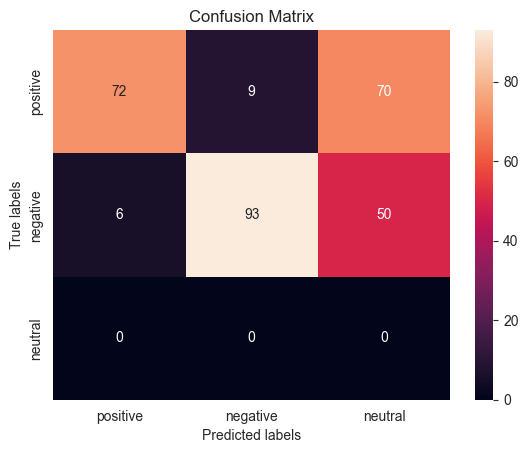

In [40]:
# create a confusion matrix of the model
# show the confusion matrix as a heatmap
# show the labels of on the x and y axis
# the true labels should be on the y axis and the predicted labels on the x axis

# use "positive" "negative" and "neutral" as labels
# plot the confusion matrix

cm = confusion_matrix(y_true, y_pred, labels=["positive", "negative", "neutral"])

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt="d")

ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["positive", "negative", "neutral"])
ax.yaxis.set_ticklabels(["positive", "negative", "neutral"])
plt.show()